<a href="https://colab.research.google.com/github/britt-klose/AIHW5/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem #1:

> Use the GA package in Google Colab  (R) to perform multi-objective engineering design optimization for a load-bearing I-beam as shown below (frontal and side views)

> Use the weighted approach where the two objective functions are converted
into a single one using the equation: F = a*f1 + b*f2

> Your R program must output two types of graph for each of the two objective functions -- the best fitness of each particle in each generation and the average population fitness.

> In addition to the two graphs, have your program display the best obtained solution for each generation.






In [26]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
# Loading the needed libraries

library(GA)
library(plotly)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -61.27903 
Solution = 
           x1       x2       x3       x4
[1,] 17.67765 16.36493 1.042949 1.398062

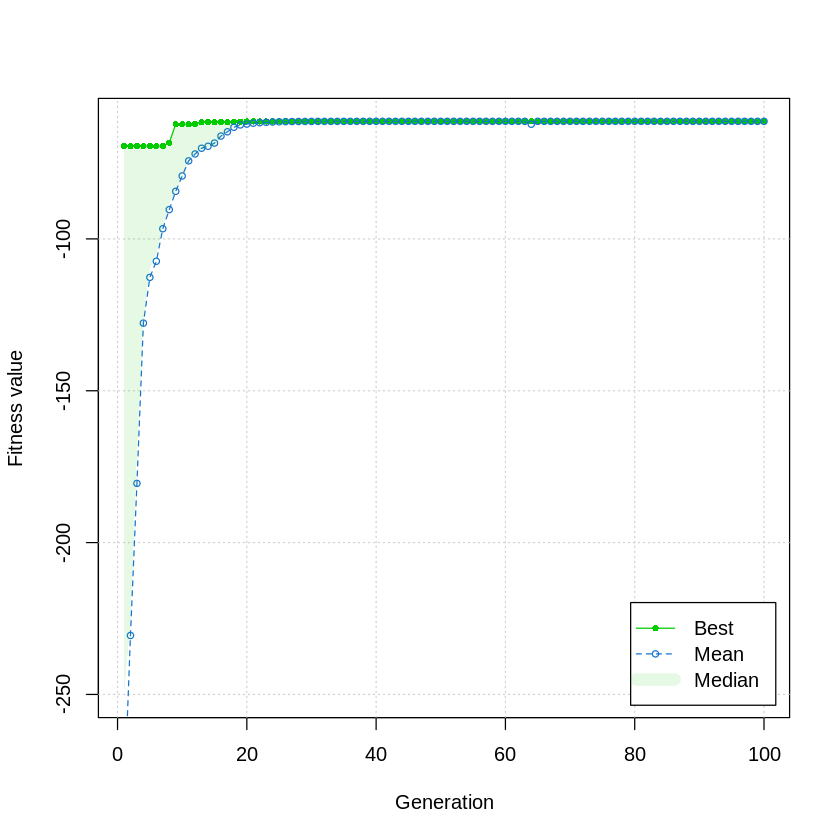

In [48]:
#Cross Section Area (f1)

func1 <- function(x1, x2, x3, x4)
{
  2*x2*x4+x3*(x1-2*x4)
}

# Parameters constraints
x1=seq(10.0, 80.0, by = 1.0)
x2= seq(10.0, 50.0, by = 1.0)
x3=seq(0.9, 5.0, by = 1.0)
x4=seq(0.9, 5.0, by = 1.0)

# Multiple func1 by -1 to minimize the function

GA <- ga(type = "real-valued",
         fitness =  function(x) -func1(x[1], x[2], x[3], x[4]),
         lower = c(10.0, 10.0, 0.9, 0.9), upper = c(80.0, 50.0, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pmutation=0.001, pcrossover=0.75)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -1427050 
Solution = 
           x1       x2       x3       x4
[1,] 12.46042 31.05194 4.872214 3.825215

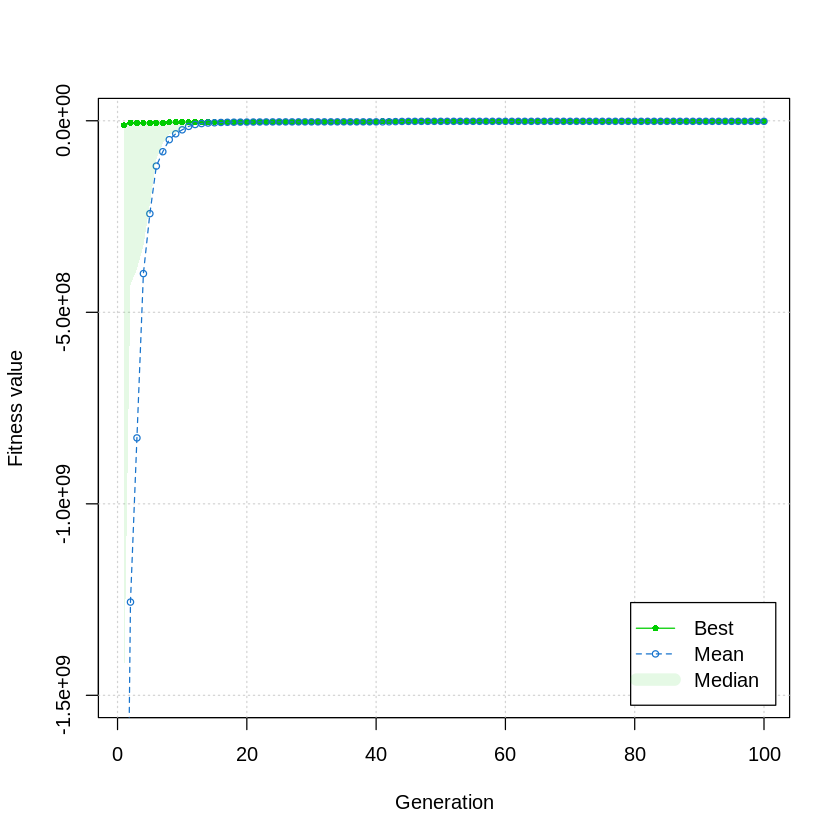

In [58]:
#Static Deflection(f2)

func2 <- function(x1, x2, x3, x4)
{
  60000 / x3*(x1-2*x4)^3 + 2*x2*x4 *(4*x4^2 + 3*x1 *(x1-2*x4))
}

# Parameters constraints
x1=seq(10.0, 80.0, by = 0.1)
x2= seq(10.0, 50.0, by = 0.1)
x3=seq(0.9, 5.0, by = 0.1)
x4=seq(0.9, 5.0, by = 0.1)

# Multiple func1 by -1 to minimize the function

GA <- ga(type = "real-valued",
         fitness =  function(x) -func2(x[1], x[2], x[3], x[4]),
         lower = c(10.0, 10.0, 0.9, 0.9), upper = c(80.0, 50.0, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pmutation=0.001, pcrossover=0.75)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -601554.7 
Solution = 
          x1       x2       x3       x4
[1,] 11.0339 36.18971 4.701115 3.270507

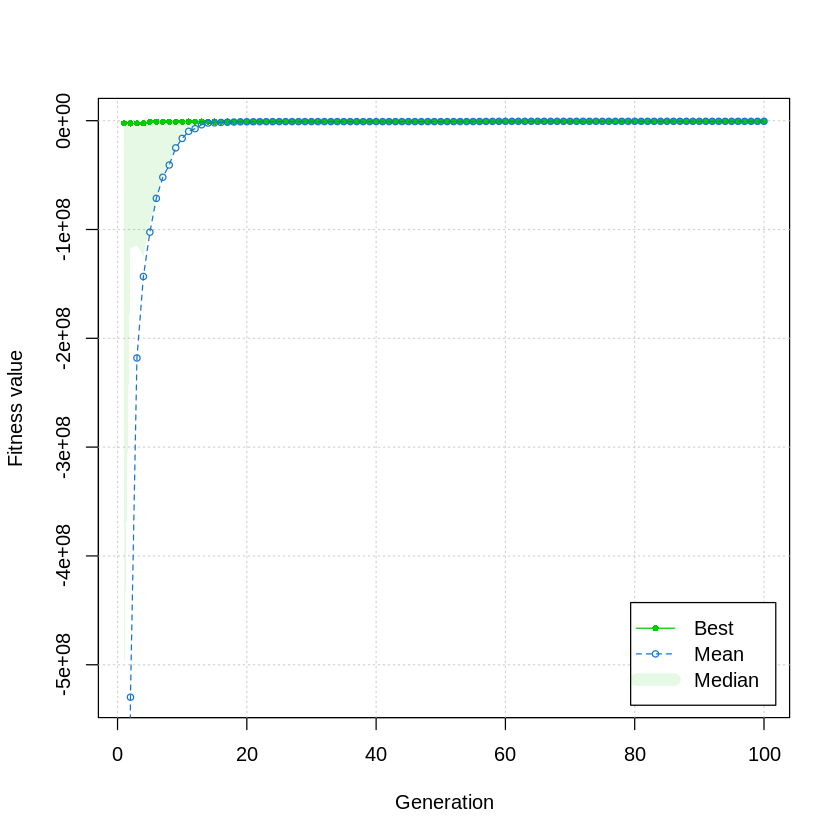

In [59]:
#Combine Objective Functions into single equation with weighted approach
# a=0.2, b=0.8
#F = a*f1 + b*f2

func3 <- function(x1, x2, x3, x4)
{
  0.5 *(2*x2*x4+x3*(x1-2*x4)) + 0.5*(60000 / x3*(x1-2*x4)^3 + 2*x2*x4 *(4*x4^2 + 3*x1 *(x1-2*x4)))
}

# Parameters constraints
x1=seq(10.0, 80.0, by = 0.1)
x2= seq(10.0, 50.0, by = 0.1)
x3=seq(0.9, 5.0, by = 0.1)
x4=seq(0.9, 5.0, by = 0.1)

# Multiple func1 by -1 to minimize the function

GA <- ga(type = "real-valued",
         fitness =  function(x) -func3(x[1], x[2], x[3], x[4]),
         lower = c(10.0, 10.0, 0.9, 0.9), upper = c(80.0, 50.0, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pmutation=0.001, pcrossover=0.75)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -37109.03 
Solution = 
           x1       x2      x3       x4
[1,] 11.97731 12.96379 4.55143 4.832724

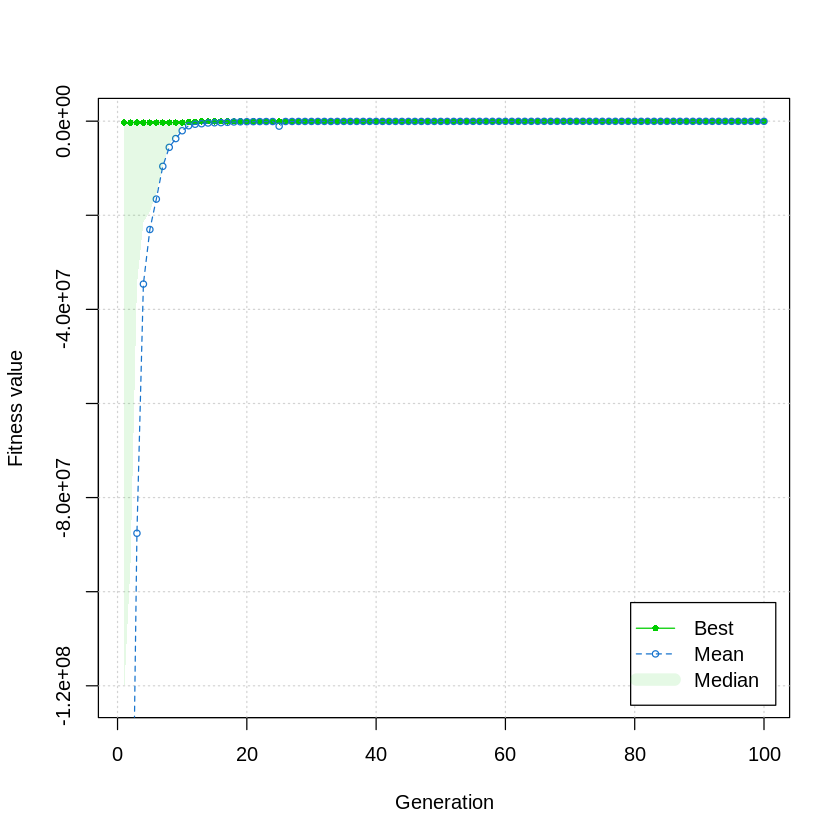

In [60]:
#Combine Objective Functions. a=0.8, b=0.2
#F = a*f1 + b*f2

func4 <- function(x1, x2, x3, x4)
{
  0.8 *(2*x2*x4+x3*(x1-2*x4)) + 0.2*(60000 / x3*(x1-2*x4)^3 + 2*x2*x4 *(4*x4^2 + 3*x1 *(x1-2*x4)))
}

# Parameters constraints
x1=seq(10.0, 80.0, by = 0.1)
x2= seq(10.0, 50.0, by = 0.1)
x3=seq(0.9, 5.0, by = 0.1)
x4=seq(0.9, 5.0, by = 0.1)

# Multiple func1 by -1 to minimize the function

GA <- ga(type = "real-valued",
         fitness =  function(x) -func4(x[1], x[2], x[3], x[4]),
         lower = c(10.0, 10.0, 0.9, 0.9), upper = c(80.0, 50.0, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pmutation=0.001, pcrossover=0.75)

summary(GA)

plot(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -383200.9 
Solution = 
           x1       x2       x3       x4
[1,] 10.68041 35.49284 2.778307 3.978312

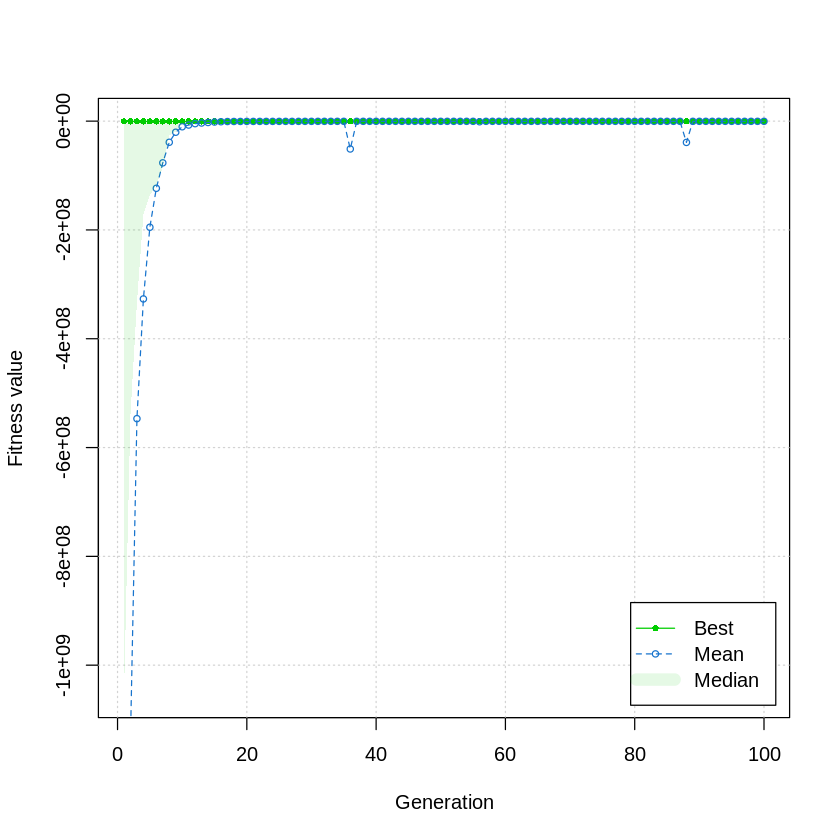

In [61]:
#Combine Objective Functions. a=0.2, b=0.8
#F = a*f1 + b*f2

func5 <- function(x1, x2, x3, x4)
{
  0.2 *(2*x2*x4+x3*(x1-2*x4)) + 0.8*(60000 / x3*(x1-2*x4)^3 + 2*x2*x4 *(4*x4^2 + 3*x1 *(x1-2*x4)))
}

# Parameters constraints
x1=seq(10.0, 80.0, by = 0.1)
x2= seq(10.0, 50.0, by = 0.1)
x3=seq(0.9, 5.0, by = 0.1)
x4=seq(0.9, 5.0, by = 0.1)

# Multiple func1 by -1 to minimize the function

GA <- ga(type = "real-valued",
         fitness =  function(x) -func5(x[1], x[2], x[3], x[4]),
         lower = c(10.0, 10.0, 0.9, 0.9), upper = c(80.0, 50.0, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pmutation=0.001, pcrossover=0.75)

summary(GA)

plot(GA)